In [ ]:
! pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d keplersmachines/kepler-labelled-time-series-data

 73% 41.0M/55.9M [00:00<00:00, 63.5MB/s]
100% 55.9M/55.9M [00:00<00:00, 95.2MB/s]


In [ ]:
! unzip kepler-labelled-time-series-data

Archive:  kepler-labelled-time-series-data.zip
  inflating: exoTest.csv             
  inflating: exoTrain.csv            


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid')
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, normalize 
from imblearn.over_sampling import SMOTE
from scipy import ndimage

In [ ]:
train=pd.read_csv('/content/exoTrain.csv')
test=pd.read_csv('/content/exoTest.csv')

In [ ]:
train.LABEL = [1 if each == 2 else 0 for each in train.LABEL]#1=exoplanet, 0=no exoplanet
test.LABEL = [1 if each == 2 else 0 for each in test.LABEL]

In [ ]:
train.LABEL.value_counts()

0    5050
1      37
Name: LABEL, dtype: int64

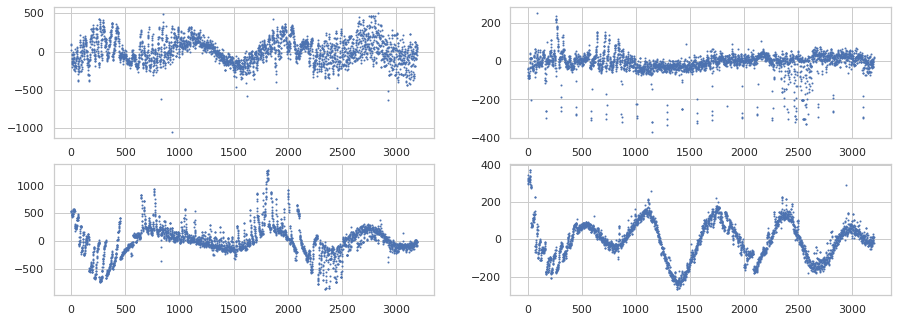

In [ ]:
# stars with exoplanets
fig = plt.figure(figsize=(15,40))
for i in range(4):
    ax = fig.add_subplot(14,2,i+1)
    ax.scatter(np.arange(3197),train[train['LABEL'] == 1].iloc[i,1:],s=1)

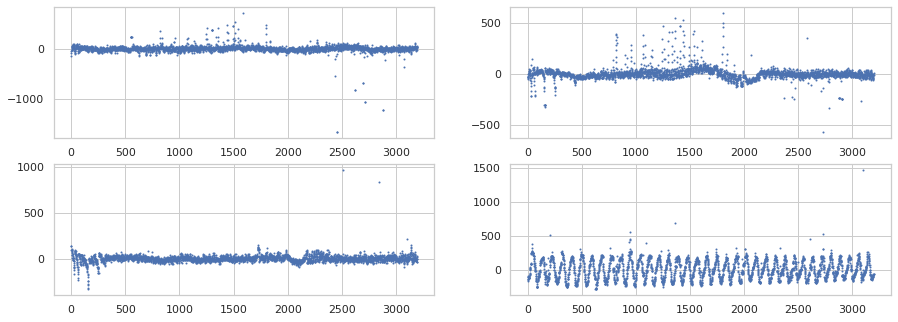

In [ ]:
# stars without exoplanets
fig = plt.figure(figsize=(15,40))
for i in range(4):
    ax = fig.add_subplot(14,2,i+1)
    ax.scatter(np.arange(3197),train[train['LABEL']==0].iloc[i,1:],s=1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

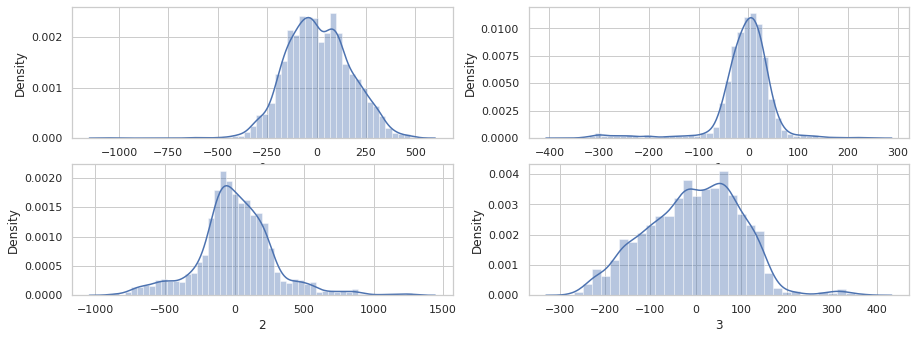

In [ ]:
# histogram with exoplanets
fig = plt.figure(figsize=(15,40))
for i in range(4):
    ax = fig.add_subplot(14,2,i+1)
#     train[train['LABEL']==1].iloc[i,1:].hist(bins=40)
    sns.distplot(train[train['LABEL']==1].iloc[i,1:])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

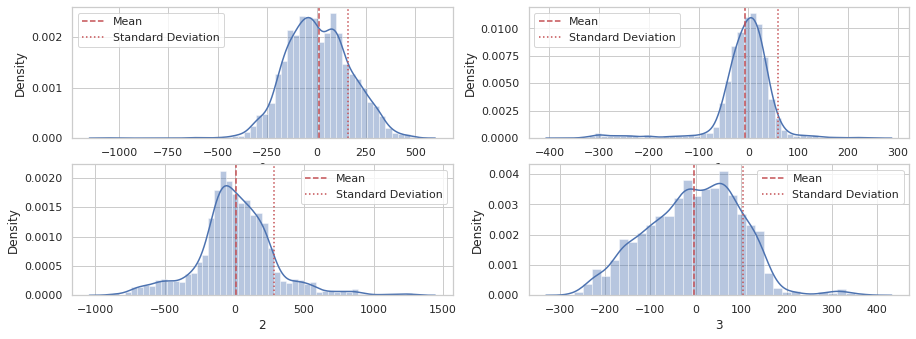

In [ ]:
# histogram with exoplanets
fig = plt.figure(figsize=(15,40))
for i in range(4):
    ax = fig.add_subplot(14,2,i+1)
#     train[train['LABEL']==1].iloc[i,1:].hist(bins=40)
    sns.distplot(train[train['LABEL']==1].iloc[i,1:], kde=True)
    plt.axvline(train[train['LABEL']==1].iloc[i,1:].mean(), color="r", linestyle="dashed", label="Mean")
    plt.axvline(
       train[train['LABEL']==1].iloc[i,1:].std(), color="r", linestyle="dotted", label="Standard Deviation"
    )
    plt.legend(loc="best")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

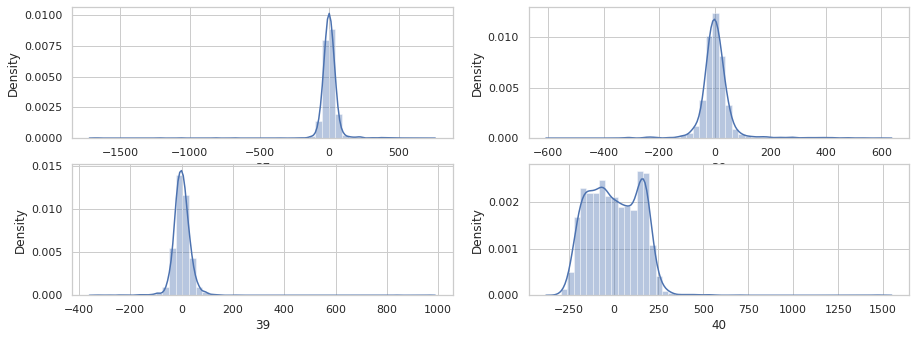

In [ ]:
# histogram without exoplanets
fig = plt.figure(figsize=(15,40))
for i in range(4):
    ax = fig.add_subplot(14,2,i+1)
#     train[train['LABEL']==0].iloc[i,1:].hist(bins=40)
    sns.distplot(train[train['LABEL']==0].iloc[i,1:])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

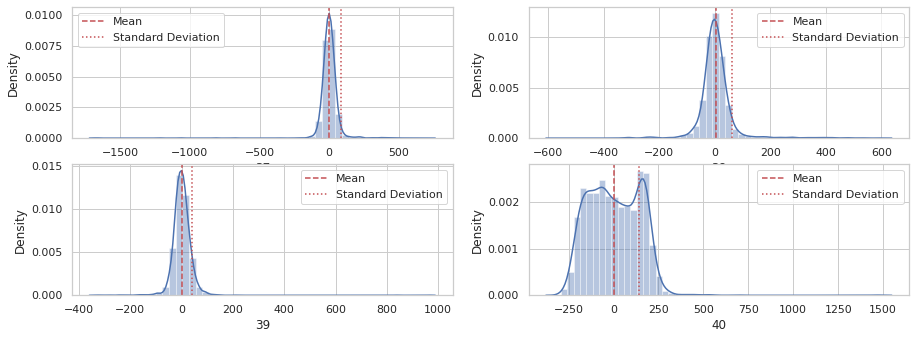

In [ ]:
# histogram without exoplanets
fig = plt.figure(figsize=(15,40))
for i in range(4):
    ax = fig.add_subplot(14,2,i+1)
#     train[train['LABEL']==1].iloc[i,1:].hist(bins=40)
    sns.distplot(train[train['LABEL']==0].iloc[i,1:], kde=True)
    plt.axvline(train[train['LABEL']==0].iloc[i,1:].mean(), color="r" ,linestyle="dashed", label="Mean")
    plt.axvline(
       train[train['LABEL']==0].iloc[i,1:].std(), color="r", linestyle="dotted", label="Standard Deviation"
    )
    plt.legend(loc="best")

In [ ]:
def flux_graph(dataset, row, dataframe, planet):
    if dataframe:
        fig = plt.figure(figsize=(10,3))
        ax = fig.add_subplot()
        ax.set_title(planet, color='black')
        ax.set_xlabel('time', color='black')
        ax.set_ylabel('flux_' + str(row), color='black')
        flux_time = list(dataset.columns)
        flux_values = dataset[flux_time].iloc[row]
        ax.plot([i + 1 for i in range(dataset.shape[1])],flux_values)
        ax.tick_params()
        plt.show()
    else:
        fig = plt.figure(figsize=(10,3))
        ax = fig.add_subplot()
        
        ax.set_title(planet, color='black')
        ax.set_xlabel('time', color='black')
        ax.set_ylabel('flux_' + str(row), color='white')
        flux_values = dataset[row]
        ax.plot([i + 1 for i in range(dataset.shape[1])], flux_values)
        ax.tick_params()
        plt.show()


def show_graph(dataframe, dataset):
    with_planet = train[train['LABEL'] == 1].head(2).index
    wo_planet = train[train['LABEL'] == 0].head(2).index

    for row in with_planet:
        flux_graph(dataset, row, dataframe, planet = 'periodic dip due to transiting planet')
    for row in wo_planet:
        flux_graph(dataset, row, dataframe, planet = 'no transiting planet')

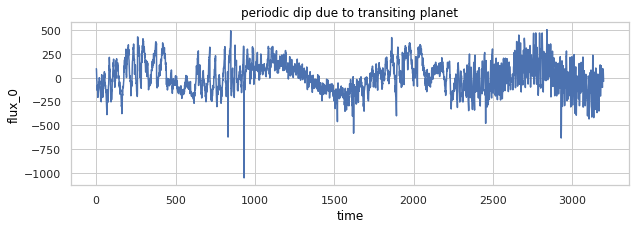

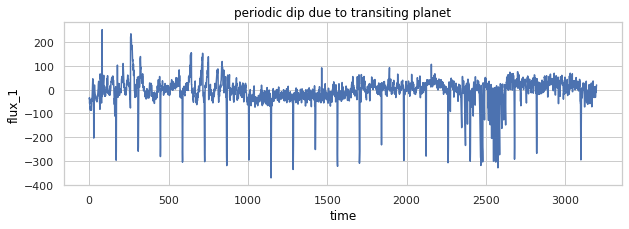

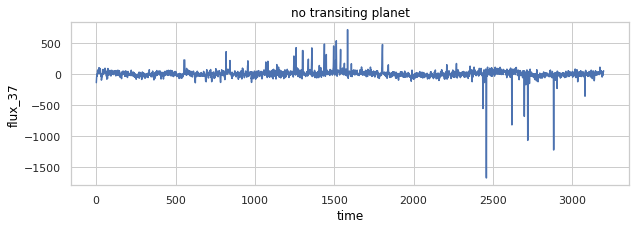

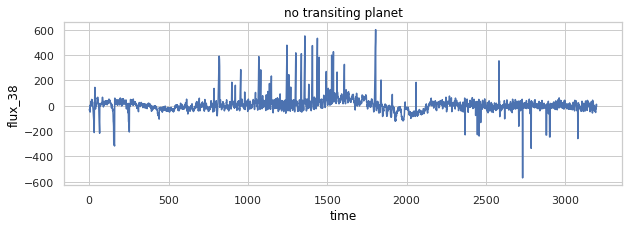

In [ ]:
show_graph(True, dataset = train.loc[:, train.columns != 'LABEL'])

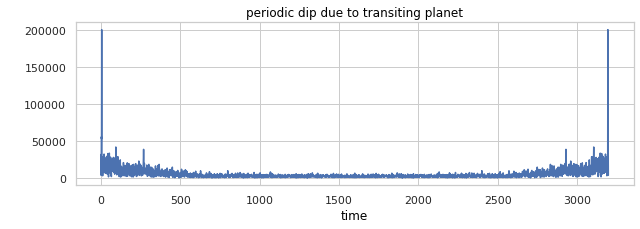

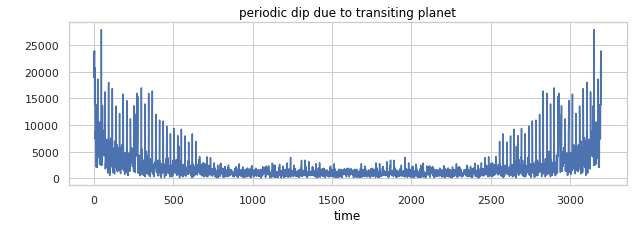

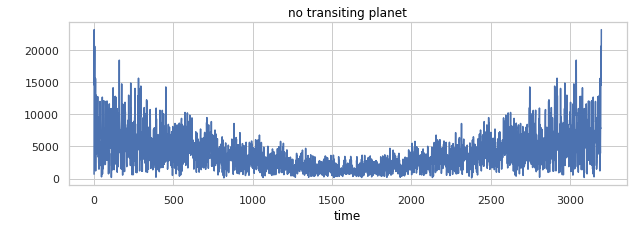

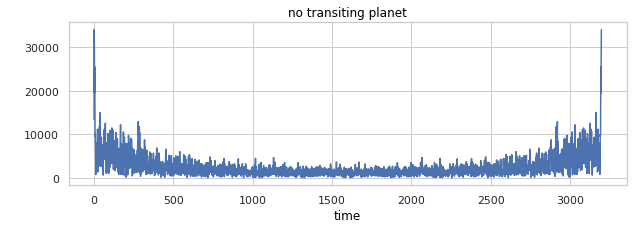

In [ ]:
fft_data = np.abs(np.fft.fft(train.loc[:, train.columns != 'LABEL']))
show_graph(False, fft_data)

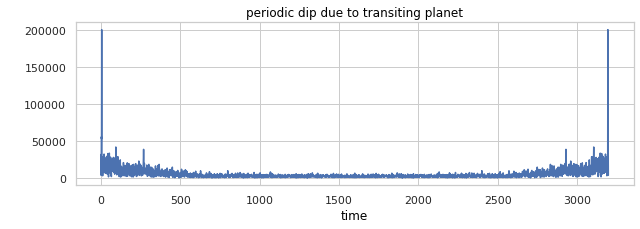

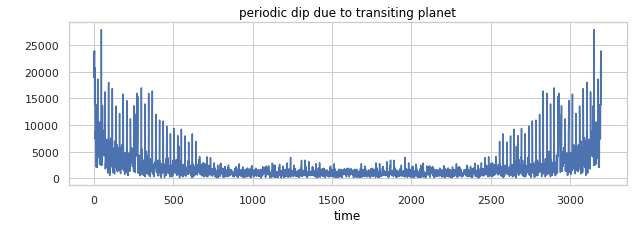

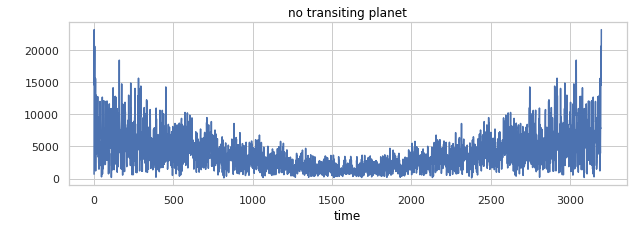

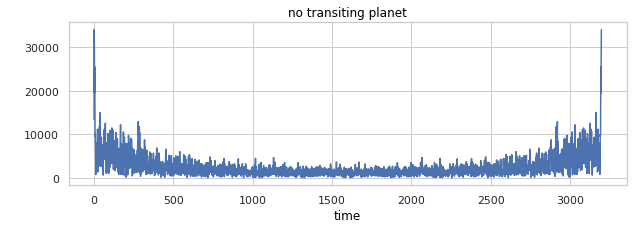

In [ ]:
from sklearn.preprocessing import normalize
normalize_data = normalize(train.loc[:, train.columns != 'LABEL'])
show_graph(False, fft_data)

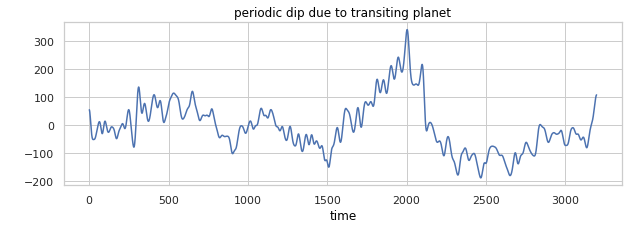

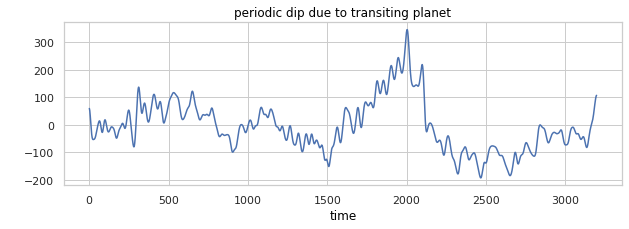

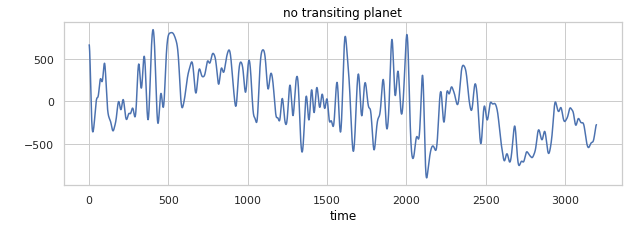

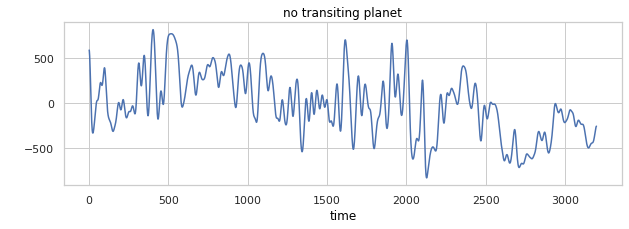

In [ ]:
from scipy import ndimage
gaussian_data = ndimage.filters.gaussian_filter(train.loc[:, train.columns != 'LABEL'],sigma=10)
show_graph(False, gaussian_data)

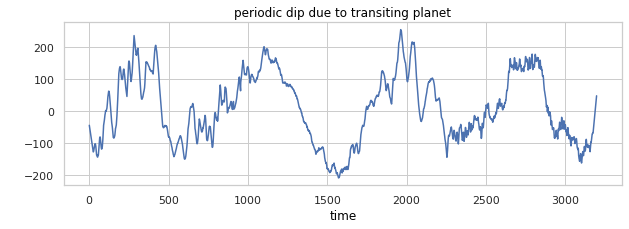

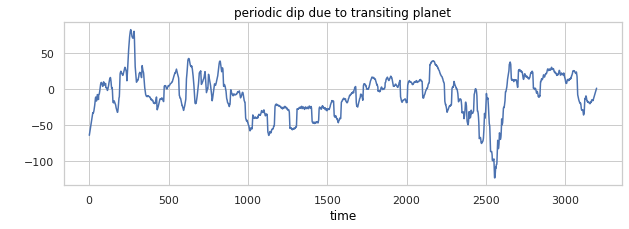

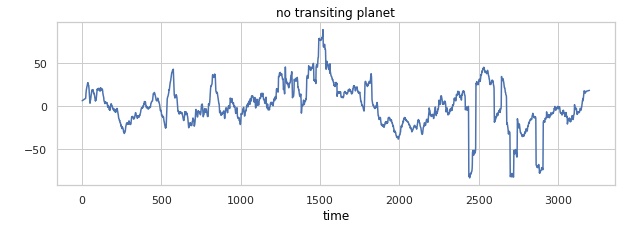

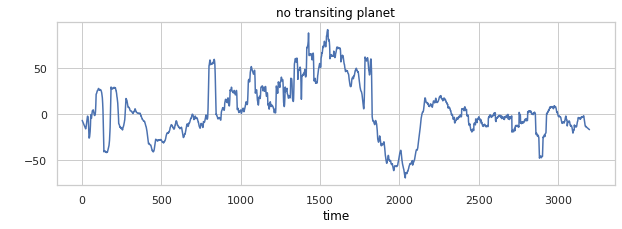

In [ ]:
from scipy.signal import savgol_filter
savgol_data = savgol_filter(train.loc[:, train.columns != 'LABEL'],45,1,deriv=0)
show_graph(False, savgol_data)

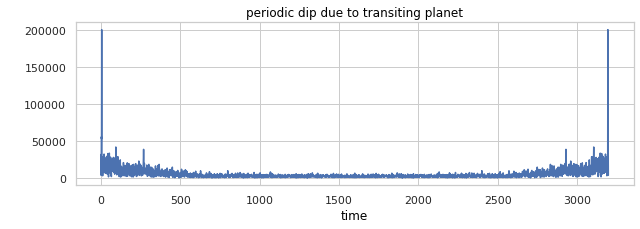

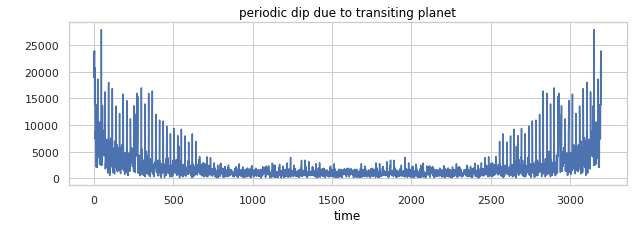

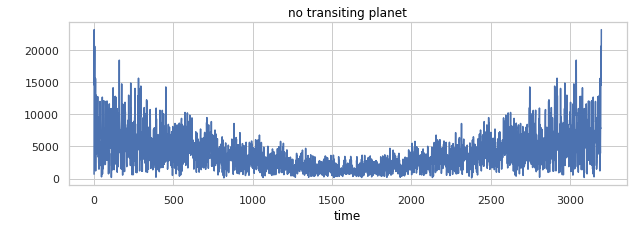

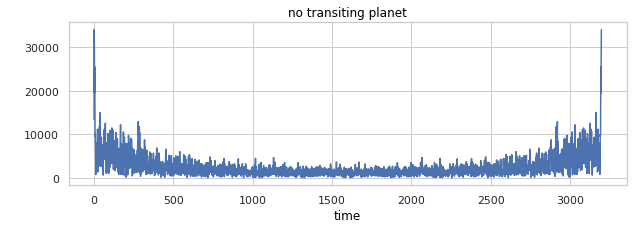

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
normalize_data = scaler.fit_transform(train.loc[:, train.columns != 'LABEL'])
show_graph(False, fft_data)

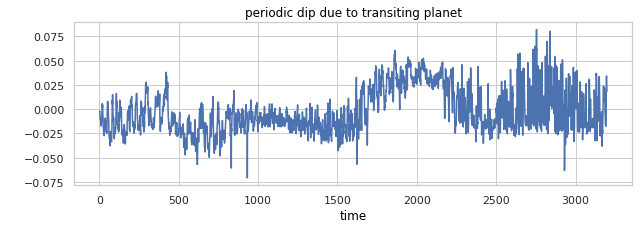

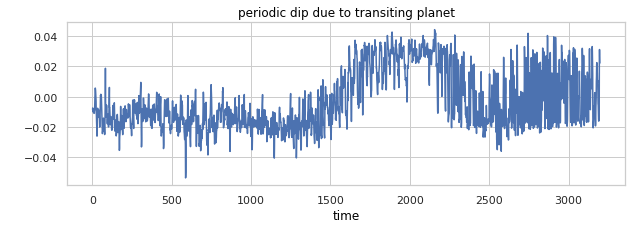

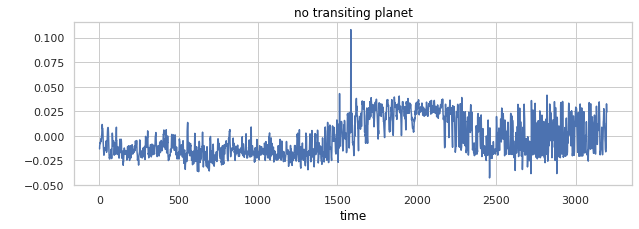

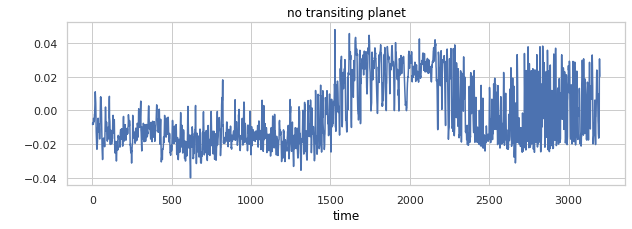

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(train.loc[:, train.columns != 'LABEL'])
show_graph(False, scaled_data)

In [ ]:
trainX=train
# train_X = train.drop('LABEL', axis=1)
train_y = train['LABEL'].values

In [ ]:
sm = SMOTE(random_state=0)
train,train_y = sm.fit_resample(train,train_y)

Text(0.5, 1.0, 'Bar Chart of each Target Class in Dataset')

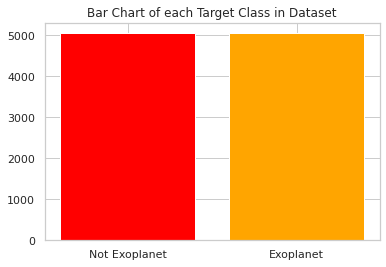

In [ ]:
Not_exo = len(train[train['LABEL'] == 0])
exo  = len(train[train['LABEL'] == 1])
num_list = [Not_exo,exo]
class_names = ['Not Exoplanet','Exoplanet']

fig1, ax1 = plt.subplots()
ax1.bar(class_names,num_list,align='center',color=['red','orange'])
ax1.set_title("Bar Chart of each Target Class in Dataset")

Text(0.5, 1.0, 'Bar Chart of each Target Class in Dataset')

<Figure size 144x720 with 0 Axes>

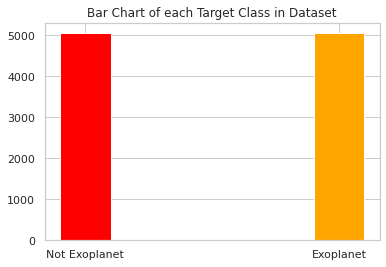

In [ ]:
Not_exo = len(train[train['LABEL'] == 0])
exo  = len(train[train['LABEL'] == 1])
num_list = [Not_exo,exo]
class_names = ['Not Exoplanet','Exoplanet']

plt.figure(figsize=(2,10))
fig1, ax1 = plt.subplots()
ax1.bar(class_names,num_list,align='center',width=0.2,color=['red','orange'])
ax1.set_title("Bar Chart of each Target Class in Dataset")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


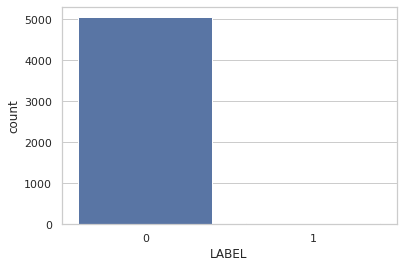

In [ ]:
sns.countplot(train['LABEL'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


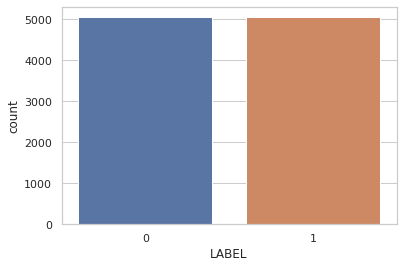

In [ ]:
sns.countplot(train.LABEL)

In [ ]:
time = np.arange(3197)
exo_flux = train.iloc[2,:]
exo_flux=exo_flux.drop('LABEL')

In [ ]:
non_exo_flux = train.iloc[50,:]
non_exo_flux=non_exo_flux.drop('LABEL')

In [ ]:
exo_flux

FLUX.1       532.64
FLUX.2       535.92
FLUX.3       513.73
FLUX.4       496.92
FLUX.5       456.45
              ...  
FLUX.3193      5.06
FLUX.3194    -11.80
FLUX.3195    -28.91
FLUX.3196    -70.02
FLUX.3197    -96.67
Name: 2, Length: 3197, dtype: float64

In [ ]:
non_exo_flux

FLUX.1        9.97
FLUX.2        8.74
FLUX.3       13.71
FLUX.4        6.59
FLUX.5        2.45
             ...  
FLUX.3193     3.76
FLUX.3194     9.43
FLUX.3195     4.74
FLUX.3196     4.79
FLUX.3197    12.96
Name: 50, Length: 3197, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 3197.0)

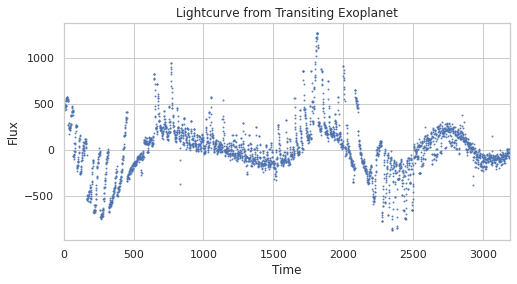

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.regplot(time, exo_flux, fit_reg=False, scatter_kws={"s": 1})
ax.set(xlabel='Time', ylabel='Flux')
ax.set_title("Lightcurve from Transiting Exoplanet")
ax.set_xlim(0, 3197)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 3197.0)

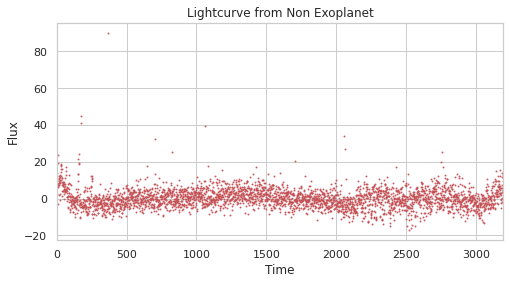

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.regplot(time, non_exo_flux, fit_reg=False, scatter_kws={"s": 1},color='r')
ax.set(xlabel='Time', ylabel='Flux')
ax.set_title("Lightcurve from Non Exoplanet")
ax.set_xlim(0, 3197)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 3197.0)

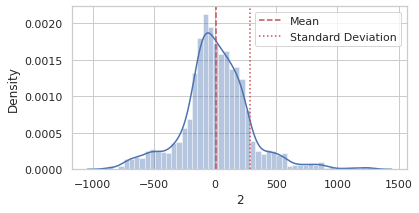

In [ ]:
plt.figure(figsize=(6,3))
sns.distplot(exo_flux, kde=True)
plt.axvline(exo_flux.mean(), color="r" ,linestyle="dashed", label="Mean")
plt.axvline(exo_flux.std(), color="r", linestyle="dotted", label="Standard Deviation")
plt.legend(loc="best")
ax.set(xlabel='Time', ylabel='Flux')
ax.set_title("Histogram of Lightcurve from Transiting Exoplanet")
ax.set_xlim(0, 3197)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 3197.0)

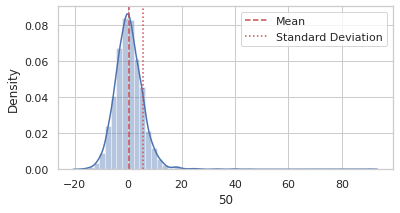

In [ ]:
plt.figure(figsize=(6,3))
sns.distplot(non_exo_flux, kde=True)
plt.axvline(non_exo_flux.mean(), color="r" ,linestyle="dashed", label="Mean")
plt.axvline(non_exo_flux.std(), color="r", linestyle="dotted", label="Standard Deviation")
plt.legend(loc="best")
ax.set(xlabel='Time', ylabel='Flux')
ax.set_title("Histogram of Lightcurve from Non Exoplanet")
ax.set_xlim(0, 3197)

FFT

In [ ]:
fft_exo = np.abs(np.fft.fft(exo_flux))
fft_non_exo = np.abs(np.fft.fft(non_exo_flux))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 3197.0)

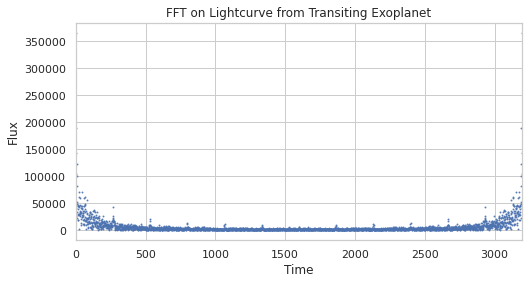

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.regplot(time, fft_exo, fit_reg=False, scatter_kws={"s": 1})
ax.set(xlabel='Time', ylabel='Flux')
ax.set_title("FFT on Lightcurve from Transiting Exoplanet")
ax.set_xlim(0, 3197)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 3197.0)

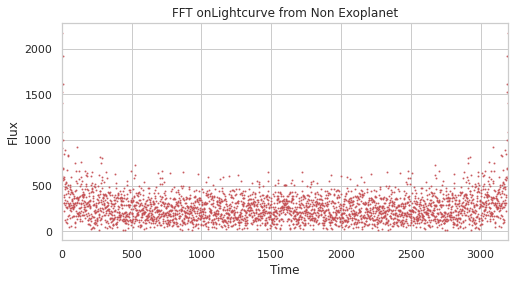

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.regplot(time, fft_non_exo, fit_reg=False, scatter_kws={"s": 1},color='r')
ax.set(xlabel='Time', ylabel='Flux')
ax.set_title("FFT onLightcurve from Non Exoplanet")
ax.set_xlim(0, 3197)

SAVGOL

In [ ]:
savgol_exo = savgol_filter(exo_flux,45,1,deriv=0)
savgol_non_exo = savgol_filter(non_exo_flux,45,1,deriv=0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 3197.0)

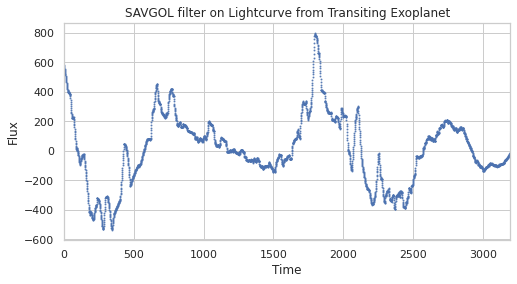

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.regplot(time, savgol_exo, fit_reg=False, scatter_kws={"s": 1})
ax.set(xlabel='Time', ylabel='Flux')
ax.set_title("SAVGOL filter on Lightcurve from Transiting Exoplanet")
ax.set_xlim(0, 3197)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 3197.0)

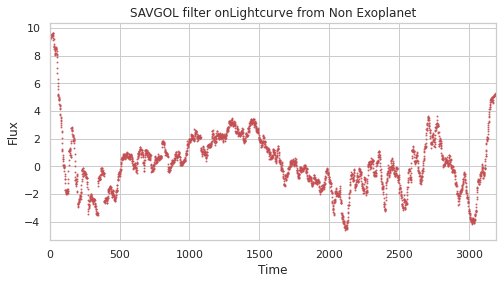

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.regplot(time, savgol_non_exo, fit_reg=False, scatter_kws={"s": 1},color='r')
ax.set(xlabel='Time', ylabel='Flux')
ax.set_title("SAVGOL filter onLightcurve from Non Exoplanet")
ax.set_xlim(0, 3197)

GAUSSIAN FILTER

In [ ]:
gauss_exo=ndimage.filters.gaussian_filter(exo_flux, sigma=10)
gauss_non_exo=ndimage.filters.gaussian_filter(non_exo_flux, sigma=10)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 3197.0)

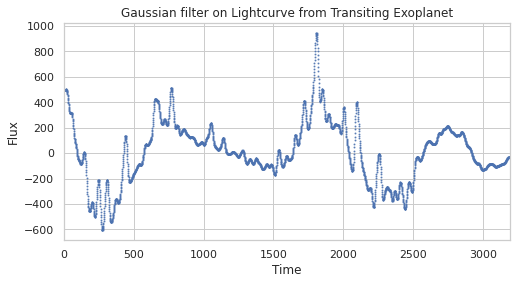

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.regplot(time, gauss_exo, fit_reg=False, scatter_kws={"s": 1})
ax.set(xlabel='Time', ylabel='Flux')
ax.set_title("Gaussian filter on Lightcurve from Transiting Exoplanet")
ax.set_xlim(0, 3197)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 3197.0)

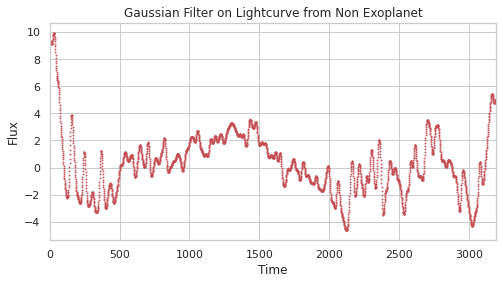

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.regplot(time, gauss_non_exo, fit_reg=False, scatter_kws={"s": 1},color='r')
ax.set(xlabel='Time', ylabel='Flux')
ax.set_title("Gaussian Filter on Lightcurve from Non Exoplanet")
ax.set_xlim(0, 3197)